# WQD7006 MACHINE LEARNING FOR DATA SCIENCE Individual Assignment (Regression) 15%

### Name: Kar Hong Sam
### Matric No: S2191926

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

1.0 Load the insurance.csv file 

In [2]:
#load insurance data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


2.0 Select the ‘bmi’, ‘age’ and ‘charges’ columns. Visualize it in 3D graph

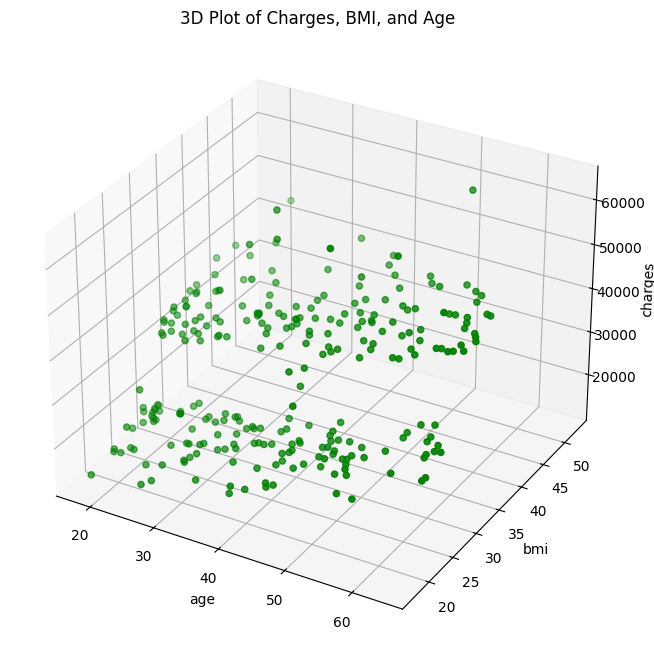

In [4]:
# Select the required columns
selected_columns = ['age', 'bmi', 'charges', 'smoker']
df_selected = df[selected_columns]

# Filter data for smokers
smoker_data = df_selected[df_selected['smoker'] == 'yes']

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(smoker_data['age'], smoker_data['bmi'], smoker_data['charges'], c='green')

# Set labels
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('charges')

# Set title
ax.set_title('3D Plot of Charges, BMI, and Age')

plt.show()

3.1 Fit two regression models on to the dataset. The train vs test ration should be set as 75: 25.

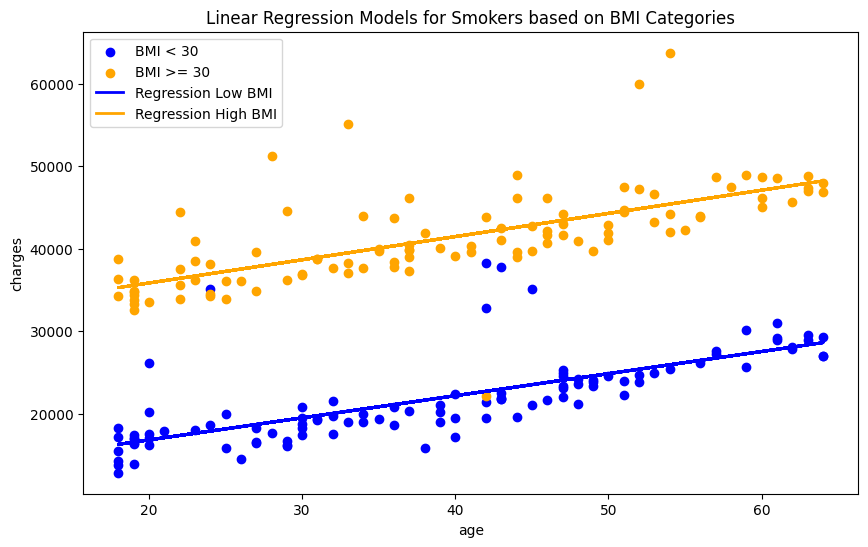

In [5]:
# Select the required columns
selected_columns = ['age', 'bmi', 'charges', 'smoker']
df_selected = df[selected_columns]

# Filter data for smokers
smoker_data = df_selected[df_selected['smoker'] == 'yes']

# Categorize BMI into two groups: bmi < 30 and bmi >= 30
smoker_data['bmi_category'] = pd.cut(smoker_data['bmi'], bins=[-float('inf'), 30, float('inf')],
                                     labels=['bmi<30', 'bmi>=30'], right=False)

# Split the data into training and testing sets (75:25 ratio)
train_data, test_data = train_test_split(smoker_data, test_size=0.25, random_state=42)

# Separate independent variable (X) and target variable (y) for training and testing sets
X_train_low_bmi = train_data[train_data['bmi_category'] == 'bmi<30'][['age']]
y_train_low_bmi = train_data[train_data['bmi_category'] == 'bmi<30']['charges']

X_train_high_bmi = train_data[train_data['bmi_category'] == 'bmi>=30'][['age']]
y_train_high_bmi = train_data[train_data['bmi_category'] == 'bmi>=30']['charges']

# Fit linear regression models
model_low_bmi = LinearRegression()
model_high_bmi = LinearRegression()

model_low_bmi.fit(X_train_low_bmi, y_train_low_bmi)
model_high_bmi.fit(X_train_high_bmi, y_train_high_bmi)

# Scatter plot with regression lines
plt.figure(figsize=(10, 6))

# Scatter plot for low BMI
plt.scatter(X_train_low_bmi, y_train_low_bmi, color='blue', label='BMI < 30')

# Scatter plot for high BMI
plt.scatter(X_train_high_bmi, y_train_high_bmi, color='orange', label='BMI >= 30')

# Regression line for low BMI
plt.plot(X_train_low_bmi, model_low_bmi.predict(X_train_low_bmi), color='blue', linewidth=2, label='Regression Low BMI')

# Regression line for high BMI
plt.plot(X_train_high_bmi, model_high_bmi.predict(X_train_high_bmi), color='orange', linewidth=2, label='Regression High BMI')

# Set labels and title
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Linear Regression Models for Smokers based on BMI Categories')
plt.legend()

# Show the plot
plt.show()

3.2 What are the values of the intercepts and parameters? There should be two intercept values and two corresponding parameters/slope.

In [6]:
# Print the intercept and parameter values for the low BMI model
print("Intercept for BMI < 30:", model_low_bmi.intercept_)
print("Parameter for BMI < 30 (slope):", model_low_bmi.coef_[0])

# Print the intercept and parameter values for the high BMI model
print("\nIntercept for BMI >= 30:", model_high_bmi.intercept_)
print("Parameter for BMI >= 30 (slope):", model_high_bmi.coef_[0])

Intercept for BMI < 30: 11445.323359279177
Parameter for BMI < 30 (slope): 268.1195960681417

Intercept for BMI >= 30: 30214.538673169438
Parameter for BMI >= 30 (slope): 281.4096342236961


4.0 What is the R² scores for both regression line? How much do you predict a person aged=10 and aged 98 will have to pay for their insurance charges?

In [7]:
# Calculate R² scores for the low and high BMI models
r2_low_bmi = r2_score(y_train_low_bmi, model_low_bmi.predict(X_train_low_bmi))
r2_high_bmi = r2_score(y_train_high_bmi, model_high_bmi.predict(X_train_high_bmi))

print("R² score for BMI < 30 model:", r2_low_bmi)
print("R² score for BMI >= 30 model:", r2_high_bmi)

# Predict insurance charges for individuals aged 10 and 98
age_10 = [[10]]
age_98 = [[98]]

charge_pred_10_low_bmi = model_low_bmi.predict(age_10)
charge_pred_98_low_bmi = model_low_bmi.predict(age_98)

charge_pred_10_high_bmi = model_high_bmi.predict(age_10)
charge_pred_98_high_bmi = model_high_bmi.predict(age_98)

print("\nPredicted insurance charges for age 10 (BMI < 30):", charge_pred_10_low_bmi[0])
print("Predicted insurance charges for age 98 (BMI < 30):", charge_pred_98_low_bmi[0])

print("\nPredicted insurance charges for age 10 (BMI >= 30):", charge_pred_10_high_bmi[0])
print("Predicted insurance charges for age 98 (BMI >= 30):", charge_pred_98_high_bmi[0])

R² score for BMI < 30 model: 0.5012873918852028
R² score for BMI >= 30 model: 0.4353349183883196

Predicted insurance charges for age 10 (BMI < 30): 14126.519319960593
Predicted insurance charges for age 98 (BMI < 30): 37721.04377395706

Predicted insurance charges for age 10 (BMI >= 30): 33028.6350154064
Predicted insurance charges for age 98 (BMI >= 30): 57792.68282709166


5.0 Fit a Multivariable Linear Regression on ‘bmi’, ‘age’, and ‘charges’ and find the plane. Visualize it as 3D graph

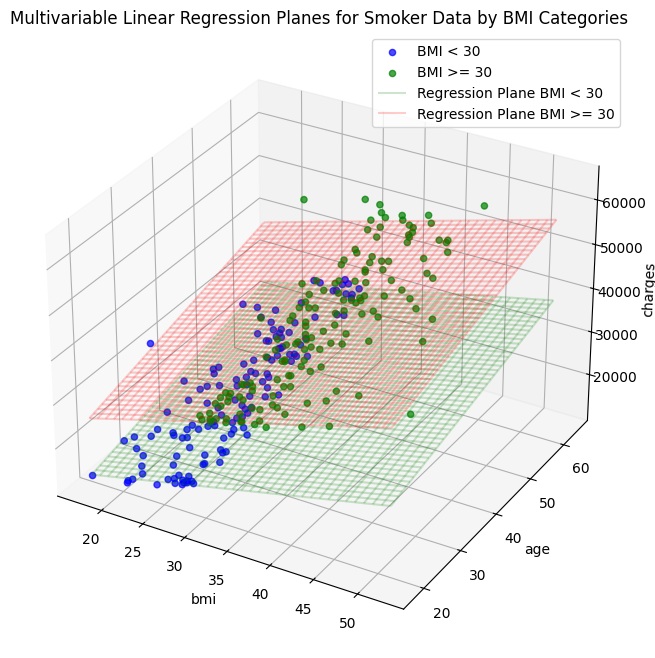

In [8]:
# Select the required columns
selected_columns = ['bmi', 'age', 'charges', 'smoker']
df_selected = df[selected_columns]

# Filter data for smokers
smoker_data = df_selected[df_selected['smoker'] == 'yes']

# Categorize BMI into two groups: bmi < 30 and bmi >= 30
smoker_data['bmi_category'] = pd.cut(smoker_data['bmi'], bins=[-float('inf'), 30, float('inf')],
                                     labels=['bmi<30', 'bmi>=30'], right=False)

# Separate independent variables (X) and target variable (y) based on BMI categories
X_low_bmi = smoker_data[smoker_data['bmi_category'] == 'bmi<30'][['bmi', 'age']]
y_low_bmi = smoker_data[smoker_data['bmi_category'] == 'bmi<30']['charges']

X_high_bmi = smoker_data[smoker_data['bmi_category'] == 'bmi>=30'][['bmi', 'age']]
y_high_bmi = smoker_data[smoker_data['bmi_category'] == 'bmi>=30']['charges']

# Fit multivariable linear regression models
model_low_bmi = LinearRegression()
model_high_bmi = LinearRegression()

model_low_bmi.fit(X_low_bmi, y_low_bmi)
model_high_bmi.fit(X_high_bmi, y_high_bmi)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for smoker data with BMI < 30
ax.scatter(X_low_bmi['bmi'], X_low_bmi['age'], y_low_bmi, color='blue', label='BMI < 30', alpha=0.7)

# Scatter plot for smoker data with BMI >= 30
ax.scatter(X_high_bmi['bmi'], X_high_bmi['age'], y_high_bmi, color='green', label='BMI >= 30', alpha=0.7)

# Create a meshgrid for the plane
bmi_range = np.arange(smoker_data['bmi'].min(), smoker_data['bmi'].max(), step=1)
age_range = np.arange(smoker_data['age'].min(), smoker_data['age'].max(), step=1)
bmi_mesh, age_mesh = np.meshgrid(bmi_range, age_range)

# Predict the charges for each point on the meshgrid for BMI < 30
charges_mesh_low_bmi = model_low_bmi.predict(np.c_[bmi_mesh.ravel(), age_mesh.ravel()])
charges_mesh_low_bmi = charges_mesh_low_bmi.reshape(bmi_mesh.shape)

# Plot the regression plane for BMI < 30
ax.plot_wireframe(bmi_mesh, age_mesh, charges_mesh_low_bmi, color='green', label='Regression Plane BMI < 30', alpha=0.2)

# Predict the charges for each point on the meshgrid for BMI >= 30
charges_mesh_high_bmi = model_high_bmi.predict(np.c_[bmi_mesh.ravel(), age_mesh.ravel()])
charges_mesh_high_bmi = charges_mesh_high_bmi.reshape(bmi_mesh.shape)

# Plot the regression plane for BMI >= 30
ax.plot_wireframe(bmi_mesh, age_mesh, charges_mesh_high_bmi, color='red', label='Regression Plane BMI >= 30', alpha=0.2)

# Set labels and title
ax.set_xlabel('bmi')
ax.set_ylabel('age')
ax.set_zlabel('charges')
ax.set_title('Multivariable Linear Regression Planes for Smoker Data by BMI Categories')

# Show the plot
plt.legend()
plt.show()